In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import sunpy.map

In [3]:
fts_fname = '../data/cor1a1/20080201_000500_1P4c1A.fts'

block_fname = '../tests/gold_SolarTom_prelim/block_SolarTom'
y_fname = '../tests/gold_SolarTom_prelim/ySolarTom'
y_idx_fname = '../tests/gold_SolarTom_prelim/y_idxSolarTom'

# Needs to match buildA_params.
IMSIZE = 1024
BINFAC = 4
M = IMSIZE // BINFAC

In [4]:
cor1a = sunpy.map.Map(fts_fname)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2008-02-01 00:05:00
Exposure Time,-1.0 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[7.5043001 7.5043001] arcsec / pix
Reference Pixel,[513.04 513.555] pix

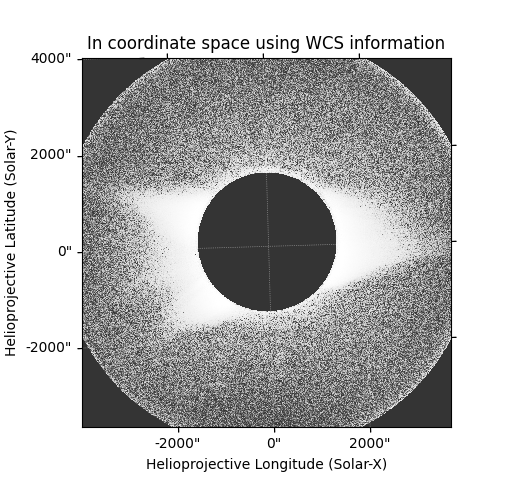
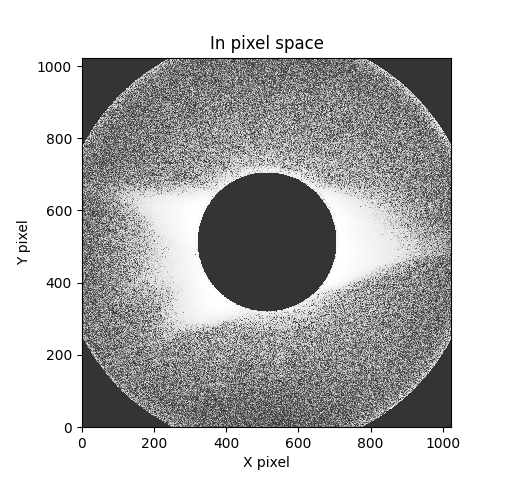
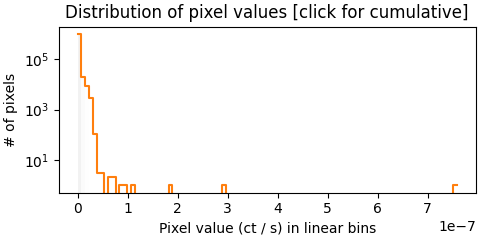
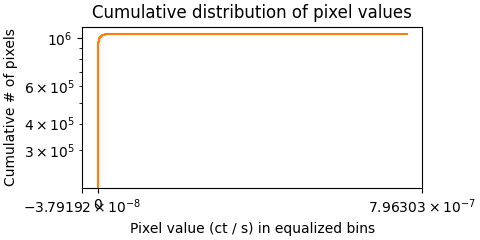

In [5]:
cor1a

In [6]:
y_all_vec = np.fromfile(y_fname, dtype=np.float32)
y_all_idx = np.fromfile(y_idx_fname, dtype=np.int32)

In [7]:
y_all_vec

array([5.6090126, 3.622711 , 3.4242935, ..., 4.990872 , 4.4966974,
       4.204084 ], dtype=float32)

In [8]:
idx = np.fromfile(block_fname, dtype=np.int32)[1:]

In [9]:
idx

array([     0,  33474,  66950, 100429, 133910, 167392, 200872, 234355,
       267842, 301330, 334821, 368318, 401813, 435311, 468815],
      dtype=int32)

In [10]:
y_vec = y_all_vec[idx[0]:idx[1]-1]
y_idx = y_all_idx[idx[0]:idx[1]-1]

In [11]:
min(y_vec), max(y_vec)

(1.9636874, 278.93292)

In [12]:
min(y_idx), max(y_idx)

(3195, 62344)

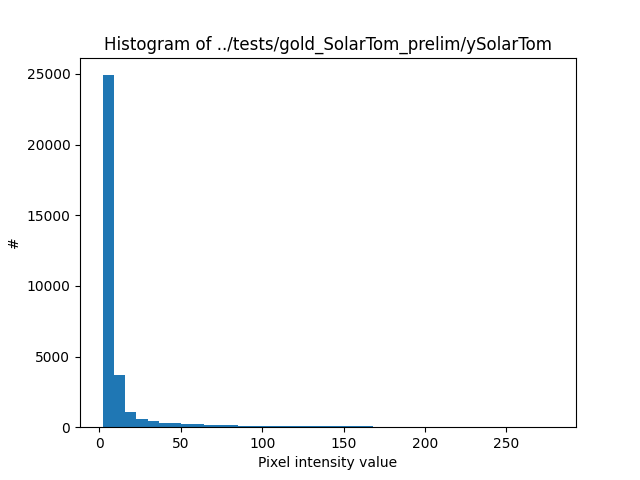

In [13]:
fig, ax = plt.subplots()
ax.hist(y_vec, bins=40);
ax.set_title(f'Histogram of {y_fname}')
ax.set_xlabel('Pixel intensity value')
ax.set_ylabel('#');

In [14]:
y = np.full(M**2, np.nan)

In [15]:
y[y_idx] = y_vec

In [16]:
y = np.reshape(y, (M, M), order='C') * 1e-10

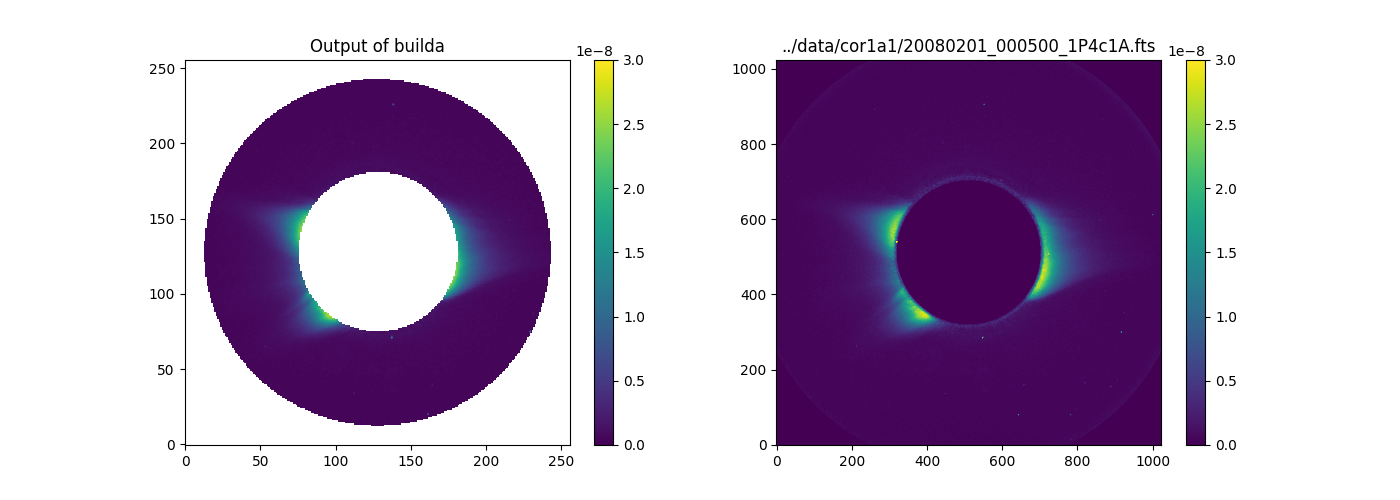

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
im0 = ax[0].imshow(y, origin='lower', vmin=0, vmax=3e-8)
ax[0].set_title('Output of builda')
fig.colorbar(im0, ax=ax[0])
im1 = ax[1].imshow(cor1a.data, origin='lower', vmin=0, vmax=3e-8)
ax[1].set_title(f'{fts_fname}')
fig.colorbar(im1, ax=ax[1]);

## Compare to synthetic coronagraph image based on reconstruction

In [18]:
w_fname = '../tests/gold_SolarTom_prelim/wSolarTom'
j_fname = '../tests/gold_SolarTom_prelim/jSolarTom'
m_fname = '../tests/gold_SolarTom_prelim/mSolarTom'

x_hat_fname = '../tests/gold_SolarTom_prelim/x_hat_SolarTom_4e-5_fess'

In [19]:
w_all_vec = np.fromfile(w_fname, dtype=np.float32)
j_all_vec = np.fromfile(j_fname, dtype=np.int32)
m_all_vec = np.fromfile(m_fname, dtype=np.int32)

In [20]:
len(w_all_vec), len(j_all_vec), m_all_vec[-1], len(m_all_vec), idx[-1]

(23735475, 23735475, 23735475, 468816, 468815)

In [21]:
I = slice(idx[0], idx[1])

In [22]:
m_vec = m_all_vec[I]

w_vec = w_all_vec[:m_vec[-1]]
j_vec = j_all_vec[:m_vec[-1]]

In [23]:
H = sp.sparse.csr_matrix((w_vec, j_vec, m_vec))

In [24]:
H.shape

(33473, 36000)

In [25]:
y_vec.shape

(33473,)

In [26]:
x_vec = np.fromfile(x_hat_fname, dtype=np.float32)
x_vec.shape

(36000,)

In [27]:
y_hat_vec = H @ x_vec

In [28]:
y_hat = np.full(M**2, np.nan)
y_hat[y_idx] = y_hat_vec
y_hat = np.reshape(y_hat, (M, M), order='C')

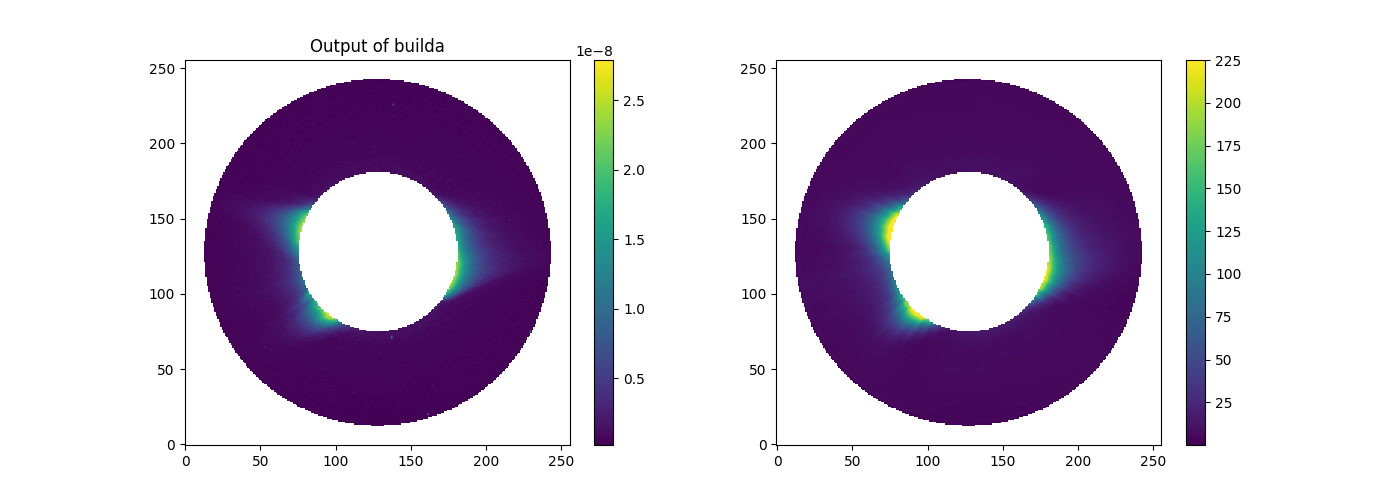

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
im0 = ax[0].imshow(y, origin='lower')
ax[0].set_title('Output of builda')
fig.colorbar(im0, ax=ax[0])
im1 = ax[1].imshow(y_hat, origin='lower', vmax=225)
fig.colorbar(im1, ax=ax[1]);